In [12]:
import sys
sys.path.append("./source")

import pandas as pd
import NovakTyson
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import train_onestep
import predict_onestep
from sklearn.ensemble import RandomForestRegressor
from scipy.integrate import odeint
import train_lmmNet
import predict_lmmNet
import tensorflow as tf
import scicomp

In [3]:
# Number of time series to generate
N = 100

# cyclin synthesis and degradation are inhibited
time_points, novak_data = NovakTyson.simulate_custom(cyclin=0, MPF=0, tlast=1500, k1=0, v2_1=0, v2_2=0, cdc25_total=5)
data_numpy = np.zeros((100, novak_data.shape[1], novak_data.shape[2]))

cyclin_list = np.random.uniform(0, 14, N)
for i in range(N):
    # cyclin synthesis and degradation are inhibited
    _, data_numpy[i, :, :] = NovakTyson.simulate_custom(cyclin = cyclin_list[i], MPF=0, tlast=1500, k1=0, v2_1=0, v2_2=0, cdc25_total=5)
    
# replace all values that are numerically zero
data_numpy = np.where(data_numpy < 1e-4, 0, data_numpy)

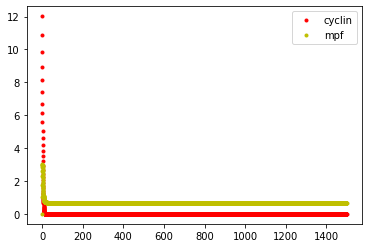

In [10]:
index = 2
plt.plot(time_points, data_numpy[index,:,0], 'r.', label='cyclin')
plt.plot(time_points, data_numpy[index,:,1], 'y.', label='mpf')

#plt.plot(time_points, predicted_test[:,0], 'b--', label='predicted dynamics')
#plt.plot(time_points, predicted_test[:,1], 'b--')
plt.legend()
plt.title("Plot data for time series #", index)
plt.show()

In [11]:

# select training and test
train_data = tf.convert_to_tensor(data_numpy[1:3,:,:], dtype=tf.float32)
test_data = tf.convert_to_tensor(data_numpy[0,:,:], dtype=tf.float32)

model = train_lmmNet.train_easy(time_points, train_data)

In [13]:
predicted_test = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), test_data[0,:], time_points)
error_dict = {}

In [23]:
mse_2 = scicomp.get_mse(predicted_test, test_data)
print(mse_2)

(0.1489802644057951, 0.4145486691167502, 0.2628599968706764, 0.6408091123957312, 3.512201248508864, 1.6233571920713845, 1.1446052645316087)


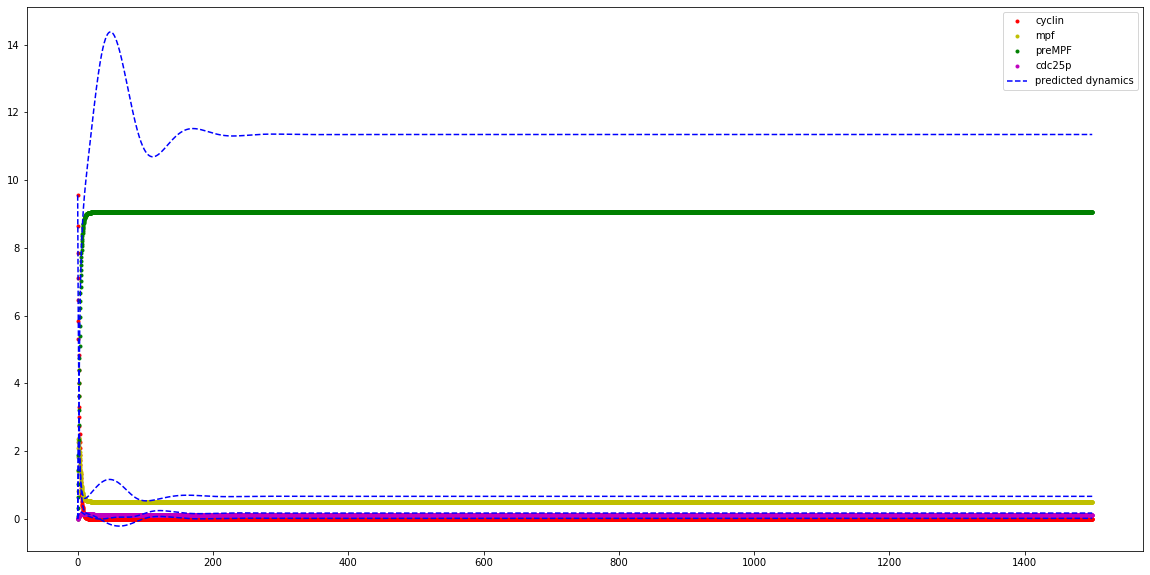

In [25]:
plt.figure(figsize=(20,10))
plt.plot(time_points, test_data[:,0], 'r.', label='cyclin')
plt.plot(time_points, test_data[:,1], 'y.', label='mpf')
plt.plot(time_points, test_data[:,2], 'g.', label='preMPF')
plt.plot(time_points, test_data[:,3], 'm.', label='cdc25p')

plt.plot(time_points, predicted_test[:,0], 'b--', label='predicted dynamics')
plt.plot(time_points, predicted_test[:,1], 'b--')
plt.plot(time_points, predicted_test[:,2], 'b--')
plt.plot(time_points, predicted_test[:,3], 'b--')
plt.legend()
#plt.title("Plot data for time series #", index)
plt.show()

In [21]:
# now we train for 10 time series
train_data = tf.convert_to_tensor(data_numpy[1:11,:,:], dtype=tf.float32)
test_data = tf.convert_to_tensor(data_numpy[0,:,:], dtype=tf.float32)

model_10 = train_lmmNet.train_easy(time_points, train_data)

In [22]:
predicted_10 = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model_10), test_data[0,:], time_points)

In [24]:
mse_10 = scicomp.get_mse(predicted_10, test_data)
print(mse_10)

(0.008800446405606364, 0.13847290545676771, 0.11116908863806207, 0.5497263726400753, 0.16799648130235953, 0.17206118799736134, 0.7599789966313916)


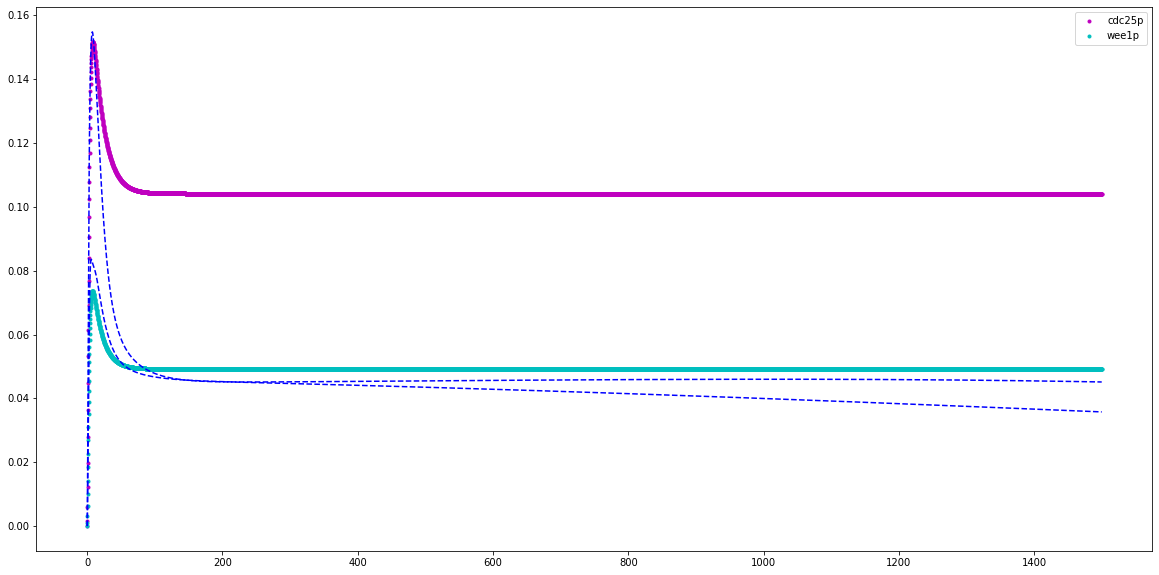

In [33]:
plt.figure(figsize=(20,10))
#plt.plot(time_points, test_data[:,0], 'r.', label='cyclin')
#plt.plot(time_points, test_data[:,1], 'y.', label='mpf')
#plt.plot(time_points, test_data[:,2], 'g.', label='preMPF')
plt.plot(time_points, test_data[:,3], 'm.', label='cdc25p')
plt.plot(time_points, test_data[:,4], 'c.', label='wee1p')

#plt.plot(time_points, predicted_10[:,0], 'b--', label='predicted dynamics')
#plt.plot(time_points, predicted_10[:,1], 'b--')
#plt.plot(time_points, predicted_10[:,2], 'b--')
plt.plot(time_points, predicted_10[:,3], 'b--')
plt.plot(time_points, predicted_10[:,4], 'b--')
plt.legend()
#plt.title("Plot data for time series #", index)
plt.show()

In [34]:
# now we train for 100 time series
train_data = tf.convert_to_tensor(data_numpy[1:,:,:], dtype=tf.float32)
test_data = tf.convert_to_tensor(data_numpy[0,:,:], dtype=tf.float32)

model_100 = train_lmmNet.train_easy(time_points, train_data)

In [35]:
predicted_100 = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model_100), test_data[0,:], time_points)

In [36]:
mse_100 = scicomp.get_mse(predicted_100, test_data)
print(mse_100)

(0.020027239778861276, 0.15353031920246754, 0.14310211633635206, 0.2593003123939759, 0.6327731978060996, 0.15430254805624358, 0.29369898507610126)


<BarContainer object of 3 artists>

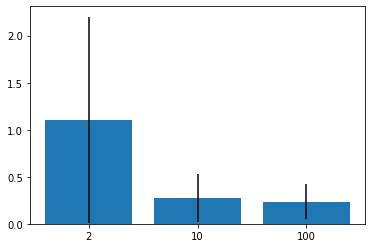

In [47]:
error_dict['mse'] = {'2': mse_2, '10':mse_10, '100':mse_100}

plt.bar(error_dict['mse'].keys(), [np.mean(x) for x in error_dict['mse'].values()],
        yerr=[np.std(x) for x in error_dict['mse'].values()])